In [132]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import gymnasium
sys.modules["gym"] = gymnasium

import gymnasium as gym

In [133]:
def QLearning(env, N_episodes, noisy_episode_n, gamma=0.99, t_max=500, alpha=0.5):
    
    def eps_greedy(Q, eps, N_acts):
        P = eps*np.ones(N_acts)/N_acts
        P[np.argmax(Q)] += 1-eps
        return np.random.choice(np.arange(N_acts), p=P)
        
    N_states = env.observation_space.n  
    N_acts = env.action_space.n 
    Q = np.zeros((N_states, N_acts))  
    eps = 1  
    total_rewards = []
    av_rewards = []
    
    for episode in range(N_episodes):  
        total_reward = 0  
        state, _ = env.reset() 
        for t in range(t_max): 
            action = eps_greedy(Q[state], eps, N_acts)  
            next_state, reward, done, _, _ =env.step(action) 
            Q[state][action] +=alpha*(reward+gamma*np.max(Q[next_state])-Q[state][action]) 
            total_reward +=reward 
            if done:
                break
            state =next_state 

        eps = max(0, eps - 1 / noisy_episode_n) 

        total_rewards.append(total_reward) 
        if (episode+1)%100 ==0:
            av_rewards.append(np.mean(total_rewards[-100:]))

    return total_rewards, av_rewards

In [134]:
from IPython.display import Image 
Image(url="DoublQ.jpg")

In [135]:
def Double_QLearning(env, N_episodes, noisy_episode_n,  t_max=500, alpha=0.5):
    
    def eps_greedy(Q1, Q2, eps, N_acts):
        P = eps*np.ones(N_acts)/N_acts
        P[np.argmax(Q1+Q2)] += 1-eps
        return np.random.choice(np.arange(N_acts), p=P)
        
    N_states = env.observation_space.n  
    N_acts = env.action_space.n 
    Q1 = np.zeros((N_states, N_acts)) 
    Q2 = np.zeros((N_states, N_acts))
    eps = 1  
    total_rewards = []
    av_rewards = []
    
    for episode in range(N_episodes):  
        total_reward = 0  
        state, _ = env.reset() 
        for t in range(t_max): 
            action = eps_greedy(Q1[state], Q2[state], eps, N_acts)  
            next_state, reward, done, _, _ =env.step(action) 
            a_hat = eps_greedy(Q1[next_state], Q2[next_state], eps, N_acts)
            if np.random.choice(np.arange(2), p=[0.5, 0.5]) ==1:
                #print("Q1", next_state, state, action, np.argmax(Q2))
                Q1[state][action] +=alpha*(reward+Q1[next_state][np.argmax(Q2[next_state][a_hat])]-Q1[state][action])
            else:
                #print("Q2", next_state, state, action, np.argmax(Q1))
                Q2[state][action] +=alpha*(reward+Q2[next_state][np.argmax(Q1[next_state][a_hat])]-Q2[state][action])
                
            total_reward +=reward 
            if done:
                break
            state =next_state 
            #print(t)
        #print(eps)
        eps = max(0, eps - 1 / noisy_episode_n) 
        total_rewards.append(total_reward) 
        if (episode+1)%100 ==0:
            av_rewards.append(np.mean(total_rewards[-100:]))
            

    return total_rewards, av_rewards

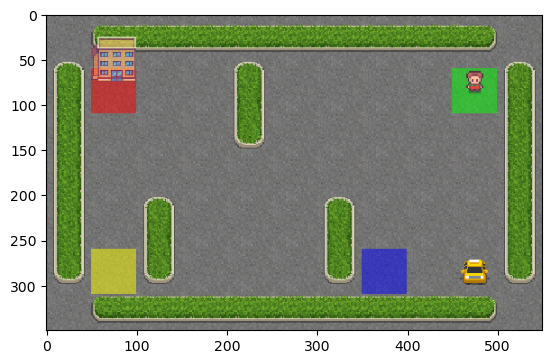

In [136]:
env = gym.make("Taxi-v3",render_mode="rgb_array")
env.reset()
img=env.render()
plt.imshow(img)
plt.show()

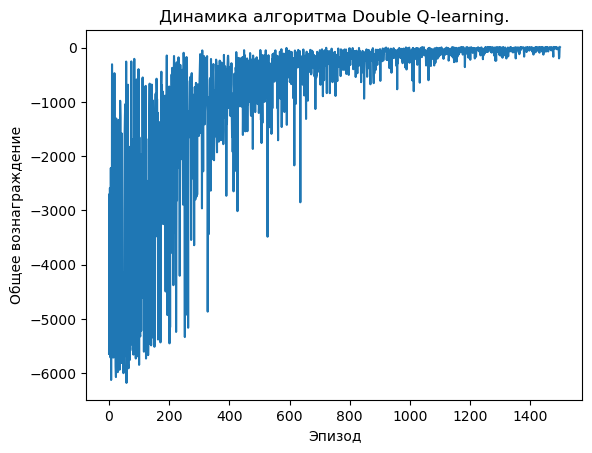

In [137]:
total_rewards, av_rewards = Double_QLearning(env, N_episodes=1500, noisy_episode_n=1400, t_max=1500, alpha=0.5)

plt.plot(total_rewards)
#plt.plot(av_reqards[-100:])
plt.title('Динамика алгоритма Double Q-learning.')
plt.xlabel('Эпизод')
plt.ylabel('Общее вознаграждение')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


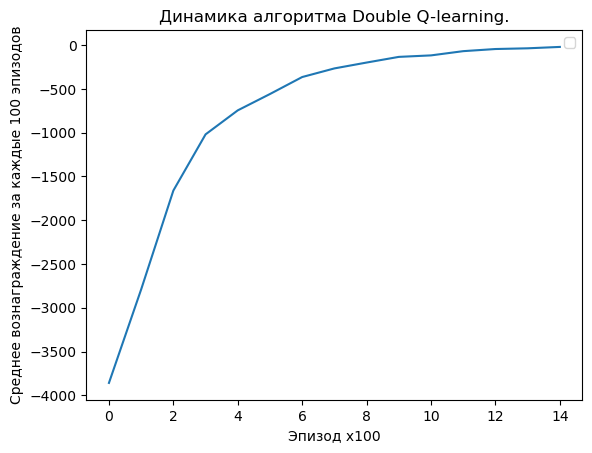

In [138]:
plt.plot(av_rewards)
plt.title('Динамика алгоритма Double Q-learning.')
plt.xlabel('Эпизод х100')
plt.ylabel('Среднее вознаграждение за каждые 100 эпизодов')
plt.legend()
plt.show()

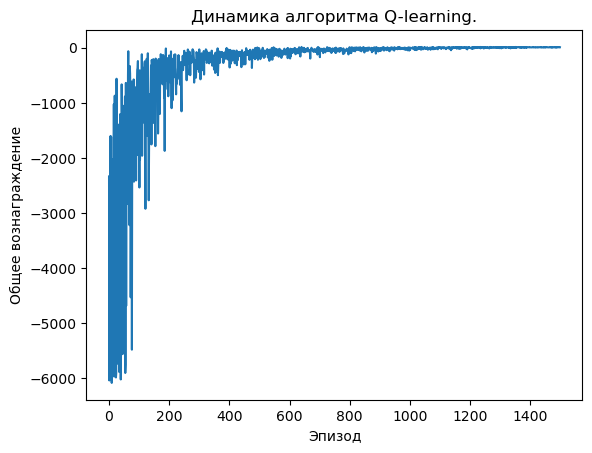

In [139]:
total_rewards1, av_rewards1 = QLearning(env, N_episodes=1500, noisy_episode_n=1400, gamma=0.995, t_max=1500, alpha=0.5)
plt.plot(total_rewards1)
#plt.plot(av_reqards[-100:])
plt.title('Динамика алгоритма Q-learning.')
plt.xlabel('Эпизод')
plt.ylabel('Общее вознаграждение')
plt.show()

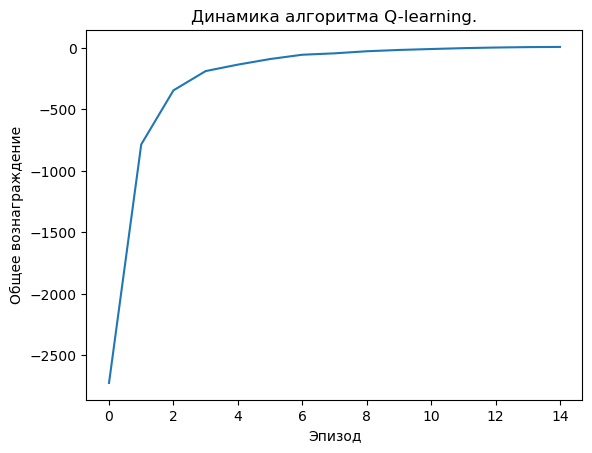

In [140]:
plt.plot(av_rewards1)
#plt.plot(av_reqards[-100:])
plt.title('Динамика алгоритма Q-learning.')
plt.xlabel('Эпизод')
plt.ylabel('Общее вознаграждение')
plt.show()